In [2]:
import sklearn
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
data=load_diabetes()


In [3]:
dir(data)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [4]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [7]:
data=pd.DataFrame(data.data,columns=data.feature_names)

In [8]:
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [10]:
data['age']=scale.fit_transform(data[['age']])
data['sex']=scale.fit_transform(data[['sex']])
data['bmi']=scale.fit_transform(data[['bmi']])
data['bp']=scale.fit_transform(data[['bp']])

In [11]:
x=data[['age','sex','bmi','bp']]

In [13]:
k_range=range(1,11)
from sklearn.cluster import KMeans
result=[]
for i in k_range:
    model=KMeans(n_clusters=i)
    model.fit_predict(x)
    result.append(model.inertia_)

C:\Users\User1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\User1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\User1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\User1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

In [14]:
result

[162.5424293108678,
 50.7640830920268,
 40.26917706062653,
 32.58937137706664,
 28.401001288564245,
 24.612500305068185,
 21.263842043513197,
 19.233507522632586,
 18.083509521278295,
 17.013486571777484]

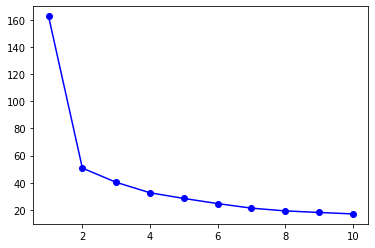

In [15]:
plt.plot(k_range,result,marker='o',color='b')

In [16]:
model=KMeans(n_clusters=3)
y_pred=model.fit_predict(x)
y_pred

C:\Users\User1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([0, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 1, 1, 0, 2, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 1,
       0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1, 0, 0,
       0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 2, 0, 2, 1, 0, 2,
       0, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 0,
       2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2,
       0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0,
       0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 1,
       2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 0, 1,

In [17]:
data['group']=y_pred


In [18]:
group1=data[data['group']==0]
group2=data[data['group']==1]
group3=data[data['group']==2]


In [19]:
group3

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,group
1,0.483333,0.0,0.148760,0.352113,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,2
3,0.083333,0.0,0.301653,0.309859,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,2
5,0.066667,0.0,0.190083,0.380282,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,2
9,0.166667,0.0,0.495868,0.323944,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,2
10,0.050000,0.0,0.024793,0.492958,-0.103389,-0.090561,-0.013948,-0.076395,-0.062917,-0.034215,2
...,...,...,...,...,...,...,...,...,...,...,...
433,0.366667,0.0,0.115702,0.338028,0.046589,0.019980,0.122273,-0.039493,-0.051404,-0.009362,2
435,0.433333,0.0,0.256198,0.295775,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357,2
436,0.233333,0.0,0.061983,0.253521,-0.024960,-0.047034,0.092820,-0.076395,-0.061176,-0.046641,2
440,0.283333,0.0,0.495868,0.464789,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,2
